# Group 1 - Data Project - TITLEEE 

> **Note the following: AND WE SHOULD DELETE THIS EVENTUALLY - CHRISTIAN** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

Imports and set magics:

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import requests
import numpy as np 
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn
from pandas_datareader import wb
import json

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

## Covid-19 confirmed cases global data

**Read the data** in ``covid19_confirmed_global.xlsx`` and **clean it** removing and renaming columns:

In [72]:
# a. Load data
confirmed = pd.read_excel('covid19_confirmed_global.xlsx')

# b. Drop columns
drop_these = ['Province/State', 'Lat', 'Long']
confirmed.drop(drop_these, axis=1, inplace=True)

# c. Rename variables
confirmed.rename(columns = {'Country/Region':'Country'}, inplace=True)

confirmed['dates'] = pd.to_datetime(confirmed.dates) 

myDict = {}
for i in range(1, 71):
    myDict[str(i)] = f'c{i}' 
myDict
confirmed.rename(columns = myDict, inplace=True)

confirmed.loc[confirmed.Country == 'Albania'] # As a test, finding the number of confirmed cases by day in Albania

# d. Indexing

# e. Summary statistics
confirmed.describe()



SyntaxError: invalid character in identifier (<ipython-input-72-b77abb1b5db5>, line 5)

## Income data

In [42]:
# a. load
inc = pd.read_excel('INDKP101.xlsx', skiprows=2)

# b. drop and rename columns
inc.drop([f'Unnamed: {i}' for i in range(3)], axis=1, inplace=True)
inc.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)

# c. drop rows with missing
inc.dropna(inplace=True)

# d. remove non-municipalities
inc = dataproject.only_keep_municipalities(inc)

# e. convert to long
inc.rename(columns = {str(i):f'income{i}' for i in range(1986,2018)}, inplace=True)
inc_long = pd.wide_to_long(inc, stubnames='income', i='municipality', j='year').reset_index()

# f. show
inc_long.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'INDKP101.xlsx'

> **Note:** The function ``dataproject.only_keep_municipalities()`` is used on both the employment and the income datasets.

## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [43]:
def plot_empl_inc(empl,inc,dataset,municipality): 
    
    if dataset == 'Employment':
        df = empl
        y = 'employment'
    else:
        df = inc
        y = 'income'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plot** is:

In [44]:
widgets.interact(plot_empl_inc, 
    
    empl = widgets.fixed(empl_long),
    inc = widgets.fixed(inc_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Employment','Income']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=empl_long.municipality.unique())
                 
); 

NameError: name 'empl_long' is not defined

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. We can illustrate this **merge** as:

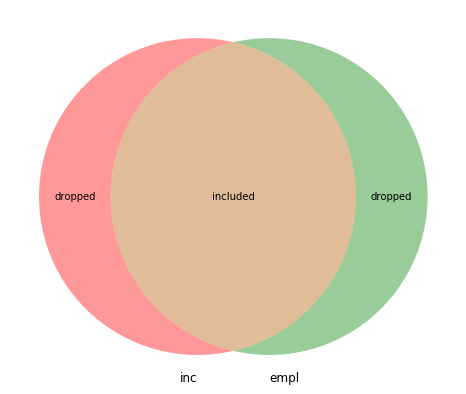

In [45]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('inc', 'empl'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

In [46]:
merged = pd.merge(empl_long, inc_long, how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

NameError: name 'empl_long' is not defined

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [47]:
merged.groupby('year').agg(['mean','std']).round(2)

NameError: name 'merged' is not defined

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.